In [225]:
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl

# Dictionary properties

First, we want to generate the matrix $U$ corresponding to the dictionary of Haar wavelets.
The following implementation is based on formulas (8) and (9) in
https://iopscience.iop.org/article/10.1088/0305-4470/36/24/316/pdf

In [226]:
def haarMatrix(n):
    if n > 2:
        h = haarMatrix(n / 2)
    else:
        return np.array([[1, 1], [1, -1]])

    # calculate upper haar part
    h_n = np.kron(h, [1, 1])
    
    # calculate lower haar part 
    h_i = np.sqrt(n/2)*np.kron(np.eye(len(h)), [1, -1])

    # combine parts
    h = np.vstack((h_n, h_i))
    return h

Run the code below to generate a visual representation of $U$. Enjoy the symmetry and understand why we need $K$ to be a power of 2.

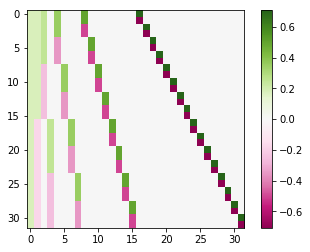

In [227]:
K = 32 #size of the dictionary. MUST be a power of 2.
U = np.transpose(haarMatrix(K)/np.sqrt(K)) #computing dictionary matrix. 
plt.imshow(U, cmap='PiYG', interpolation='nearest')
plt.colorbar()
plt.show()

**Question:** Why are the entries in the last columns of dark color? Why is this crucial? (Hint: Energy, cf. Ex 1)

Next, notice that $U$ is orthonormal

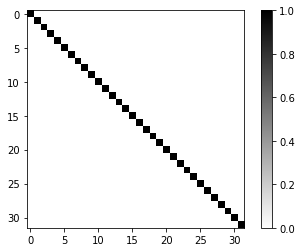

In [228]:
plt.imshow(np.dot(np.transpose(U),U),cmap='binary', interpolation='nearest')
plt.colorbar()
plt.show()

# Coding step

**Task A :** build a sparse signal corrupted by small Gaussian noise in the cell below

<function matplotlib.pyplot.show(*args, **kw)>

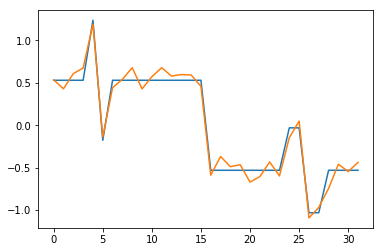

In [229]:
# solution
z_true = np.zeros((K,)) 
z_true[1] = 3
z_true[int(K/2)-2] = 1
z_true[int(K/2)+2] = 1
x_true = np.dot(U,z_true)
x_noisy = x_true + 0.1*np.random.normal(size=K) # nature
plt.plot(range(K),x_true,range(K),x_noisy)
plt.show

# Decoding step

**Task B :** Compute the Haar transform of the noisy signal and plot it. What do you notice?

**Sol :** that it spikes at the solution 

<function matplotlib.pyplot.show(*args, **kw)>

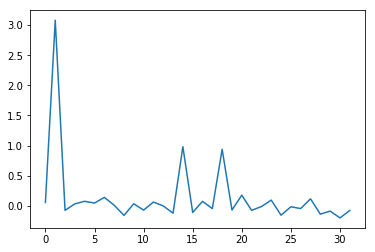

In [230]:
#solution
z_est = np.dot(np.transpose(U),x_noisy)
plt.plot(range(K),z_est)
plt.show

**Task C :** Compare this to what you learned in Exercise 1. Does the math match what we observe?

**Sol :** The math matches. Indeed in expectation the true components will have a bigger magnitude (see solutions)

**Task D :** Apply thresholding on the Haar transform and plot the signal reconstruction.

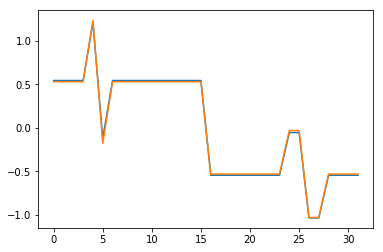

In [231]:
#solution
z_est[z_est<0.3]=0
x_est = np.dot(U,z_est)
plt.plot(range(K),x_est,range(K),x_true)

**Task E** :Increase the noise level, what happens?

**Sol** : One might not be able to recover the true signal

**BONUS TASK!!**

Analyse the spectrum of the audios for two types of drums using Haar Wavelets and FFT

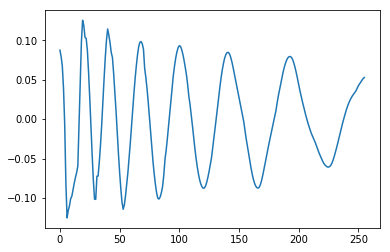

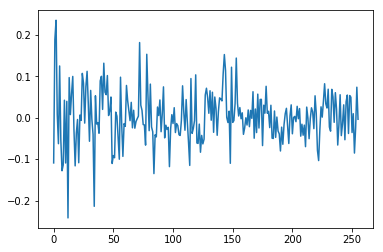

In [232]:
#importing audio files
from scipy.io import wavfile
rate, audio3 = wavfile.read('drum1.wav')
audio3 = np.mean(audio3, axis=1) #averaging out channels
audio3 = audio3[::10]
audio3 = audio3[120:376]
audio3=audio3/np.linalg.norm(audio3)
plt.plot(audio3)
rate, audio8 = wavfile.read('drum2.wav')
audio8 = np.mean(audio8, axis=1) #averaging out channels
audio8 = audio8[::100]
audio8 = audio8[20:276]
plt.figure()
audio8=audio8/np.linalg.norm(audio8)
plt.plot(audio8)

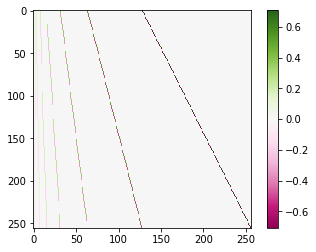

In [233]:
#getting Haar matrix
U = np.transpose(haarMatrix(2**(8))/np.sqrt(2**(8))) #computing dictionary matrix. 
plt.imshow(U, cmap='PiYG', interpolation='nearest')
plt.colorbar()
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

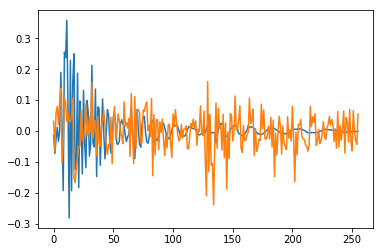

In [234]:
#getting Spectrum with Haar wavelets..
spectrum3 = np.dot(np.transpose(U),audio3)
spectrum8 = np.dot(np.transpose(U),audio8)
plt.plot(spectrum3)
plt.show
plt.plot(spectrum8)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

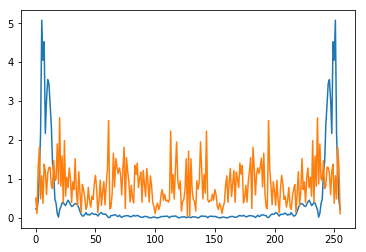

In [235]:
#getting Spectrum with Fourier transform..
spectrum3 = np.abs(np.fft.fft(audio3))
spectrum8 = np.abs(np.fft.fft(audio8))
plt.plot(spectrum3)
plt.show
plt.plot(spectrum8)
plt.show